In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from joblib import dump, load

import plotly.express as px

In [2]:
data_url = "https://raw.githubusercontent.com/digipodium/Datasets/main/oil_dataset.csv"
df = pd.read_csv(data_url)

In [3]:
df.head()

,Mendacium,Depth,Price
0,3.359,1722.533,74.048691
1,1.348,2062.571,83.321907
2,0.418,2013.507,82.748964
3,8.193,1420.607,84.760494
4,5.210,951.957,54.588671


In [4]:
px.scatter_3d(df,x = "Mendacium",y ="Depth",z="Price",color="Price")

In [5]:
# Feature selection (X, y) & Split into xtrain,xtest,ytrain,ytest
X = df[['Mendacium','Depth']]
y = df['Price']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2, random_state=1)

In [6]:
model = DecisionTreeRegressor()
model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [7]:
print("score:", model.score(xtest,ytest) * 100)
pred = model.predict(X)
print("mse:",mean_squared_error(y,pred))
print("mae:",mean_absolute_error(y,pred))

score: 92.18618276872081
mse: 16.263163593887406
mae: 1.44187518921


<AxesSubplot:ylabel='Density'>

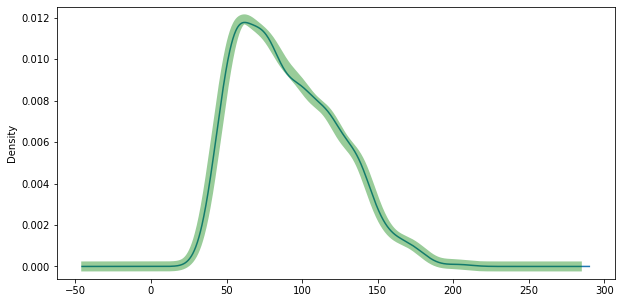

In [8]:
# visualization
df['p1'] = pred
ax = df['Price'].plot(kind='kde',figsize=(10,5))
df['p1'].plot(kind='kde',ax=ax,alpha=.4, color='green',linewidth=10)

<function matplotlib.pyplot.show(close=None, block=None)>

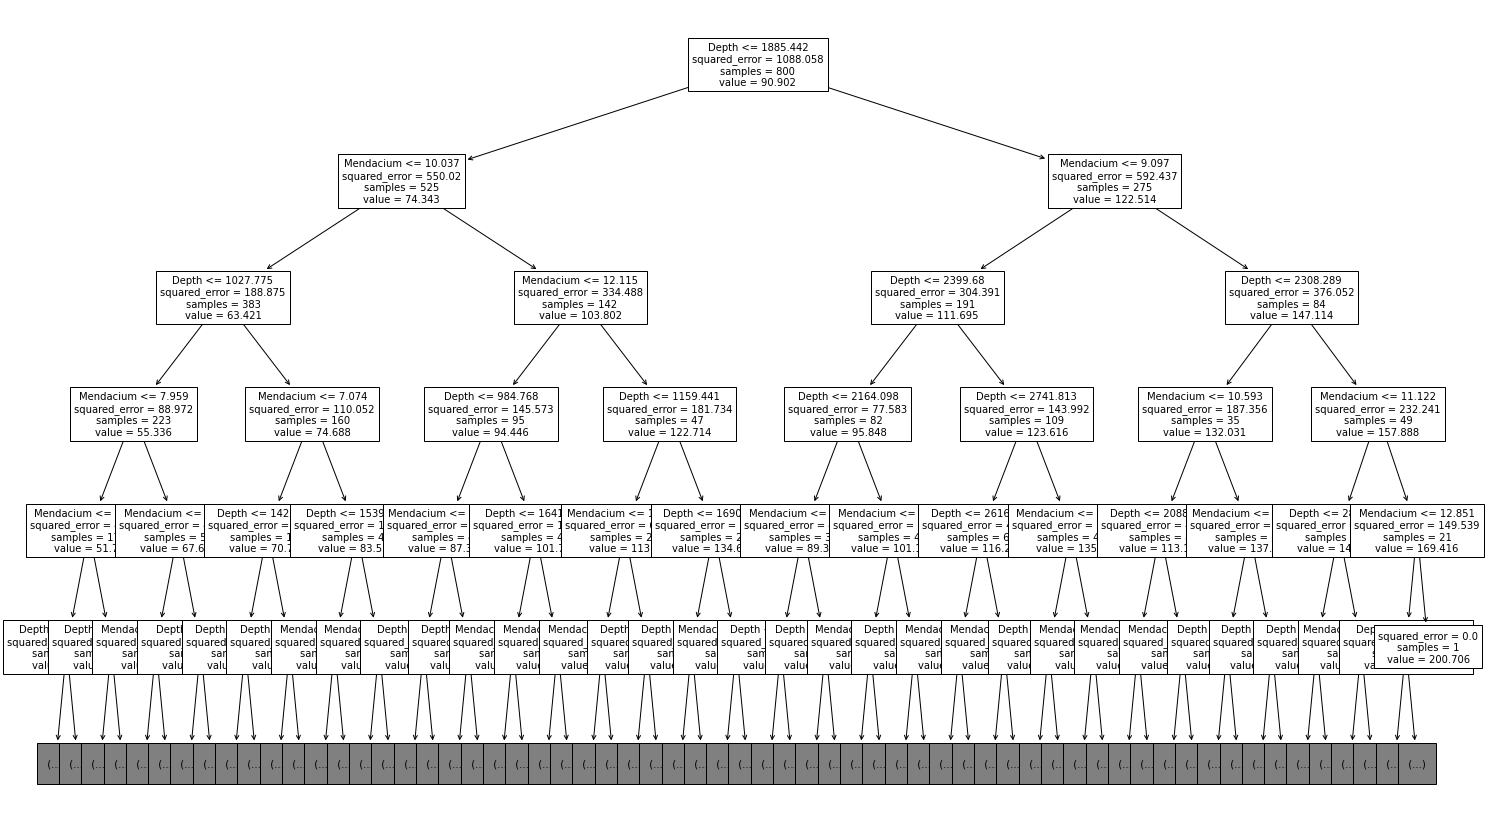

In [9]:
plt.figure(figsize=(25,15))
plot_tree(model,max_depth=5,fontsize=10,feature_names=["Mendacium","Depth"],)
plt.show

In [10]:
dump(model,"oil_pricing.pkl")

['oil_pricing.pkl']